# 1. Importamos las librerias necesarias

In [2]:
import numpy as np #Para algebra lineal
import pandas as pd #Manejo de datos
import matplotlib.pyplot as plt #Visualización
import seaborn as sns # Visualización

# 2. Cargamos la data

In [15]:
df = pd.read_csv("car_evaluation_MD.csv")

### Variables

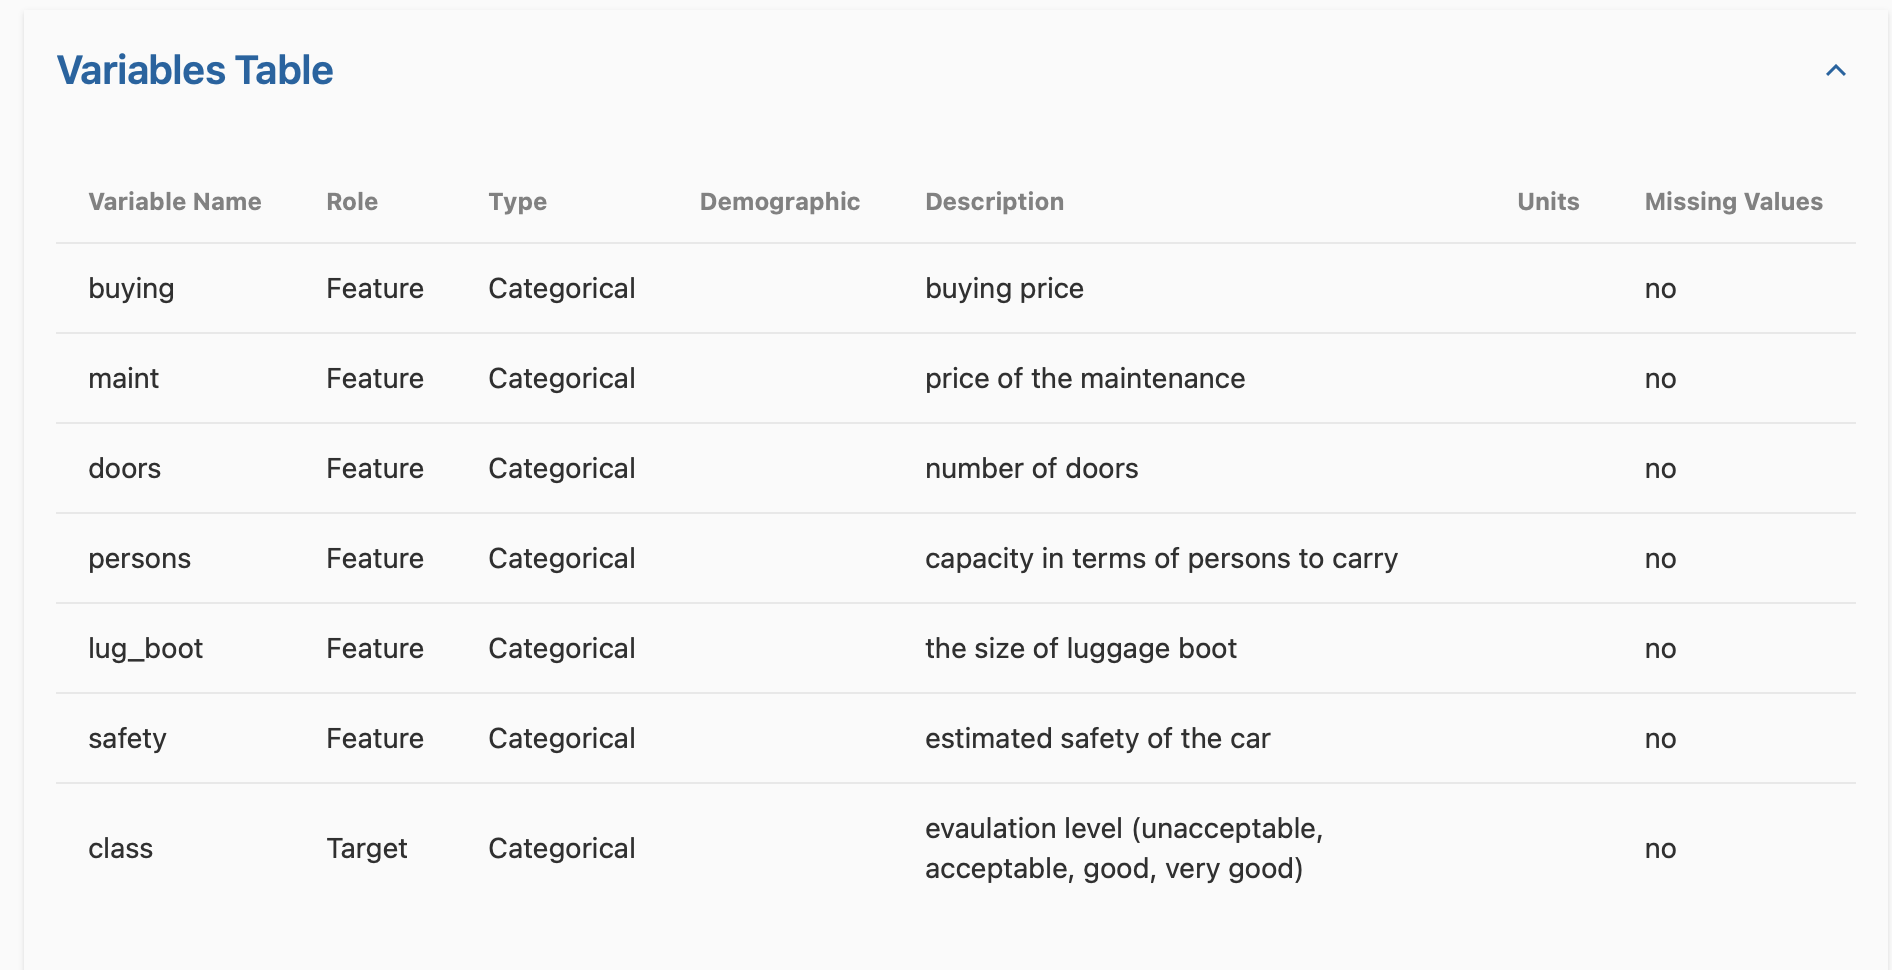

#### Referencia - https://archive.ics.uci.edu/dataset/19/car+evaluation

# 3. EDA

In [19]:
df.shape

(1728, 7)

#### Vemos que hay 7 columnas (caracteristicas) y 1728 registros

In [20]:
#Vemos los primeros registros
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Vemos resumen del dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Vemos distribuciones 

In [22]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 
    print("-"*50)

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
--------------------------------------------------
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
--------------------------------------------------
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
--------------------------------------------------
2       576
4       576
more    576
Name: persons, dtype: int64
--------------------------------------------------
small    576
med      576
big      576
Name: lug_boot, dtype: int64
--------------------------------------------------
low     576
med     576
high    576
Name: safety, dtype: int64
--------------------------------------------------
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
--------------------------------------------------


### Vemos que persons y doors son categoricas y no númericas, las trataremos como tal.

## Resumen de Variables

#### Hay 7 variables en total.
#### Todas son categoricas
#### Class es la variable objetivo

In [23]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### Valores que hacen falta

In [24]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# 4. Declaramos variable objetivo y variables predictoras

In [25]:
X = df.drop(['class'], axis=1)

y = df['class']

# 5. Dividimos en entrenamiento y prueba

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [27]:
#Vemos la estructura del data set.
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# 6. Ingeniería de caracteristicas

### Es el proceso de transformar la data cruda caracteristicas que
### ayudaran a que entendamos mejor el modelo y mejoremos su poder predictivo

In [28]:
#Vemos los tipos de variables

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode a las variables categoricas (todas)

In [29]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


### Todas las variables categoricas son ordinales.

In [30]:
import category_encoders as ce

In [31]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

#### El orden de las categorías codificadas se basa en el orden en que aparecen en los datos al ajustar el transformador (fit del encoder). Se puede especificar el orden tambien pasandolo como parametro en un diccionario

In [33]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [34]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# 7. Arbol de decision con criterio Gini

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Iniciamos el modelo con el criterio de Gini

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


#Ajustamos
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predecimos...

In [37]:
y_pred_gini = clf_gini.predict(X_test)

### Vemos precision del modelo con el criterio Gini

In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_gini)

#y_test son las de verdad
#y_pred_gini son las predicciones

print('Precisión del modelo con Gini: ', round(accuracy,4))

Precisión del modelo con Gini:  0.8021


### Comparamos la precision del set de entrenamiento y los de prueba 

In [39]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [40]:
accuracy_pred_train_gini = accuracy_score(y_train, y_pred_train_gini)

print('Training-set accuracy score: ', accuracy_pred_train_gini)

Training-set accuracy score:  0.7865168539325843


### Buscamos sobreajuste


In [41]:
print('Training set score: ',clf_gini.score(X_train, y_train))

print('Test set score: ',clf_gini.score(X_test, y_test))

Training set score:  0.7865168539325843
Test set score:  0.8021015761821366


### NO hay sintoma de sobreajuste, ambas precisiones se parecen bastante

# Visualizamos

[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

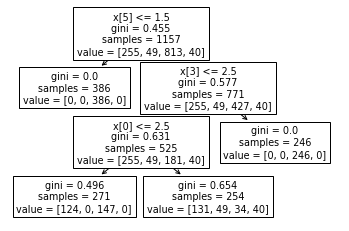

In [28]:

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

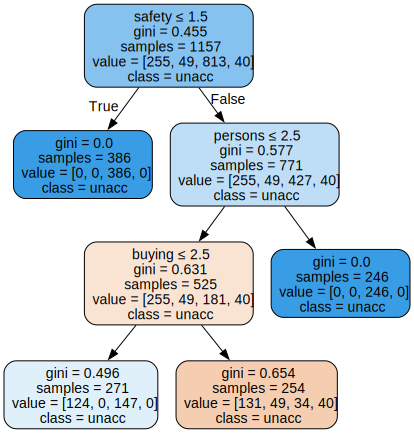

In [29]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

# 8. Matriz de confusión

#### Verdaderos Positivos
#### Verdaderos Negativos
#### Falsos Positivos
#### Falsos Negativos


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


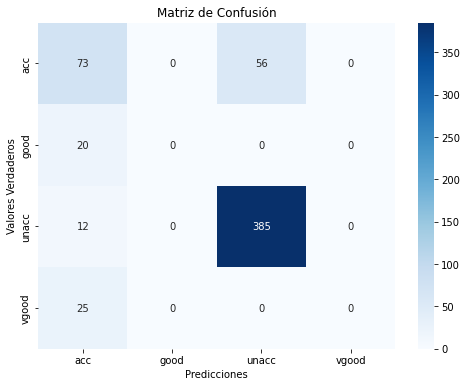

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

labels = ['acc', 'good', 'unacc', 'vgood'] 


# Usamos Seaborn para crear una visualización más atractiva
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Añadir los títulos y etiquetas correspondientes
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')

# Mostrar la figura
plt.show()


# 9. Reporte de clasificación

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.